In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.linalg import null_space
import graphviz

pi = math.pi
cos = np.cos
sin = np.sin

In [3]:
# num of majority 
N = 1000
# num of minority 
M = 50

r = np.random.rand(N) * 5
s = np.random.rand(N) * 2*pi - pi

r2 = np.random.rand(M) * 2
s2 = np.random.rand(M) * 2*pi - pi


In [41]:
#Generating data
x_major = r * cos (s) 
y_major = r * sin (s)
x_minor = r2 * cos (s2) + 2 
y_minor = r2 * sin (s2) + 2
major = np.hstack((x_major.reshape(N,1),y_major.reshape(N,1))) 
minor = np.hstack((x_minor.reshape(M,1),y_minor.reshape(M,1)))
                  
tot = np.vstack((np.hstack((x_major,x_minor)).reshape(N+M,1) , np.hstack((y_major,y_minor)).reshape(N+M,1) ) )

target_tot = np.vstack(( np.zeros(shape=(N,1)) , np.ones(shape=(M,1))) )


array([[ 0.64878286,  1.39370149],
       [ 0.3667569 ,  2.27336956],
       [ 0.55174419, -0.47836375],
       ...,
       [-1.40599543,  2.69332015],
       [-0.17682401, -0.1871531 ],
       [-2.3898199 , -1.14889266]])

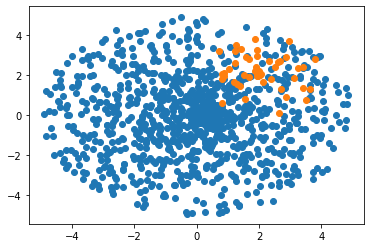

In [5]:
#data Shape
plt.scatter(x_major,y_major)
plt.scatter(x_minor,y_minor)

In [99]:
#train Original data by Dicsiontree
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(xy_tot, target_tot)
train_result =clf.predict(xy_tot)


0.0
Error Ratio for depth 3 dicision tree is : 4.666666666666667% 
Major Error Ratio: 0.0% 
Minor Error Ratio: 98.0% 


[Text(181.35000000000002, 190.26, 'X[1] <= 1.313\nmse = 0.045\nsamples = 1050\nvalue = 0.048'),
 Text(111.60000000000001, 135.9, 'X[1] <= 0.592\nmse = 0.006\nsamples = 776\nvalue = 0.006'),
 Text(55.800000000000004, 81.53999999999999, 'X[0] <= 2.634\nmse = 0.002\nsamples = 660\nvalue = 0.002'),
 Text(27.900000000000002, 27.180000000000007, 'mse = 0.0\nsamples = 593\nvalue = 0.0'),
 Text(83.7, 27.180000000000007, 'mse = 0.015\nsamples = 67\nvalue = 0.015'),
 Text(167.4, 81.53999999999999, 'X[1] <= 0.602\nmse = 0.033\nsamples = 116\nvalue = 0.034'),
 Text(139.5, 27.180000000000007, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(195.3, 27.180000000000007, 'mse = 0.025\nsamples = 115\nvalue = 0.026'),
 Text(251.10000000000002, 135.9, 'X[0] <= 0.708\nmse = 0.137\nsamples = 274\nvalue = 0.164'),
 Text(223.20000000000002, 81.53999999999999, 'mse = 0.0\nsamples = 150\nvalue = 0.0'),
 Text(279.0, 81.53999999999999, 'X[0] <= 2.082\nmse = 0.231\nsamples = 124\nvalue = 0.363'),
 Text(251.1000000000

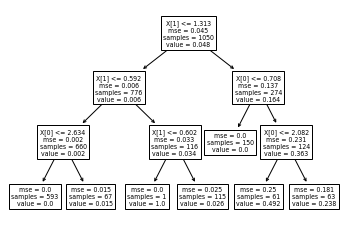

In [100]:
#Dicsiontree Result
summer = 0
summer_major = 0
summer_minor = 0
for idx,result_ in enumerate(train_result):
    #print(result_)
    if result_>0.5:
     #   print(target_tot[idx][0])
        diff = np.abs(1-target_tot[idx][0])
        summer = summer + diff
        
    else :
        diff = np.abs(0-target_tot[idx][0])
        summer = summer + diff
    if target_tot[idx][0] == 1:
        summer_minor += diff
    if target_tot[idx][0] == 0:
        summer_major += diff
print(summer_major)
print( 'Error Ratio for depth 3 dicision tree is : '+ str(summer / (N+M) * 100)  +'% ')
print( 'Major Error Ratio: '+ str(summer_major / (N) * 100)  +'% ')
print( 'Minor Error Ratio: '+ str(summer_minor / (M) * 100)  +'% ')

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
tree.plot_tree(clf) 

In [52]:
#1 bruthforth tomet link
#1step - What is Threshold for nearlist point , O (m*n)
# 1-1 for each minority point , find nearlist point
# 1-2 threshold = avg their distance with 

def d (x,y):
   # print(x-y)
    return np.linalg.norm(x-y,ord= 2)

In [102]:
major_undersample = np.array(major)

avgger = 0
for i in range(N,M+N):
    min_d = 99999
    for j in range (1,N):
        if i == j:
            continue
        if float(d (xy_tot[i], xy_tot[j])) < min_d:
            min_d = d ( xy_tot[i], xy_tot[j])
    avgger = avgger + min_d/M


tor = avgger*2
print('tor for tomek link : ' +str(tor))

for i in range(N,M+N):
    j = 0
    while j < len(major_undersample):
        if d (xy_tot[i], major_undersample[j]) < tor:
            major_undersample = np.delete(major_undersample, j,0);
           # print(j, len(major_undersample))
            j-=1
        j+=1
            

tor for tomek link : 0.37090277857616033


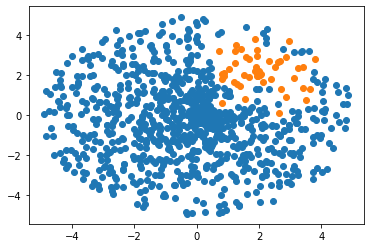

In [103]:
plt.scatter(major_undersample[:,0],major_undersample[:,1])
plt.scatter(x_minor,y_minor)

In [104]:
(newN,dum)=major_undersample.shape
xy_undersampled = np.vstack((major_undersample,minor))
target_undersampled = np.vstack(( np.zeros(shape=(newN,1)) , np.ones(shape=(M,1))) )

clf2 = tree.DecisionTreeRegressor(max_depth=3)
clf2 = clf2.fit(xy_undersampled, target_undersampled)
train_result2 =clf2.predict(xy_tot)

Error Ratio for depth 3 dicision tree is : 6.2857142857142865% 
Major Error Ratio: 5.7% 
Minor Error Ratio: 18.0% 


[Text(181.35000000000002, 190.26, 'X[1] <= 1.313\nmse = 0.05\nsamples = 952\nvalue = 0.053'),
 Text(111.60000000000001, 135.9, 'X[1] <= 0.592\nmse = 0.007\nsamples = 741\nvalue = 0.007'),
 Text(55.800000000000004, 81.53999999999999, 'X[0] <= 2.634\nmse = 0.002\nsamples = 644\nvalue = 0.002'),
 Text(27.900000000000002, 27.180000000000007, 'mse = 0.0\nsamples = 579\nvalue = 0.0'),
 Text(83.7, 27.180000000000007, 'mse = 0.015\nsamples = 65\nvalue = 0.015'),
 Text(167.4, 81.53999999999999, 'X[1] <= 0.602\nmse = 0.04\nsamples = 97\nvalue = 0.041'),
 Text(139.5, 27.180000000000007, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(195.3, 27.180000000000007, 'mse = 0.03\nsamples = 96\nvalue = 0.031'),
 Text(251.10000000000002, 135.9, 'X[0] <= 0.708\nmse = 0.168\nsamples = 211\nvalue = 0.213'),
 Text(223.20000000000002, 81.53999999999999, 'mse = 0.0\nsamples = 147\nvalue = 0.0'),
 Text(279.0, 81.53999999999999, 'X[0] <= 3.127\nmse = 0.209\nsamples = 64\nvalue = 0.703'),
 Text(251.10000000000002, 2

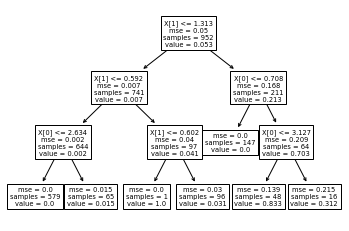

In [105]:
#New Dicsiontree Result
summer = 0
summer_minor = 0
summer_major = 0
for idx,result_ in enumerate(train_result2):
    #print(result_)
    if result_>0.5:
     #   print(target_tot[idx][0])
        diff = np.abs(1-target_tot[idx][0])
        summer = summer + diff
        
    else :
        diff = np.abs(0-target_tot[idx][0])
        summer = summer + diff
    if target_tot[idx][0] == 1:
        summer_minor += diff
    if target_tot[idx][0] == 0:
        summer_major += diff
#print(summer_major)
print( 'Error Ratio for depth 3 dicision tree is : '+ str(summer / (N+M) * 100)  +'% ')
print( 'Major Error Ratio: '+ str(summer_major / (N) * 100)  +'% ')
print( 'Minor Error Ratio: '+ str(summer_minor / (M) * 100)  +'% ')

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
tree.plot_tree(clf2) 

In [87]:
(newN,XXX) = major_undersample.shape

In [60]:
major 

array([[ 0.64878286,  1.39370149],
       [ 0.3667569 ,  2.27336956],
       [ 0.55174419, -0.47836375],
       ...,
       [-1.40599543,  2.69332015],
       [-0.17682401, -0.1871531 ],
       [-2.3898199 , -1.14889266]])

In [61]:
major_undersample = np.array(major)

In [62]:
major_undersample

array([[ 0.64878286,  1.39370149],
       [ 0.3667569 ,  2.27336956],
       [ 0.55174419, -0.47836375],
       ...,
       [-1.40599543,  2.69332015],
       [-0.17682401, -0.1871531 ],
       [-2.3898199 , -1.14889266]])